# Ablation study
Ablation study zajmuje się analizą wynkiów sieci neuronowych poprzez zmiane i usuwanie niektórych komponentów, co pozwala na zrozumienie ich wkładu w ogólny performance systemu. Wymagane jest ponadto aby system po umieszczeniu w nim zmian nadal był sprawny na tyle by można było porównać jak zmieniły się wyniki. \
Źródła: \
https://en.wikipedia.org/wiki/Ablation_(artificial_intelligence) \
https://stats.stackexchange.com/questions/380040/what-is-an-ablation-study-and-is-there-a-systematic-way-to-perform-it

 **UWAGA: Włączenie całości kodu jest bardzo czasochłonne ze względu na trenowanie dużej ilość modeli**

In [2]:
import keras
from keras import layers
from keras import models
from keras.layers import Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.metrics import Accuracy,Precision,Recall,AUC 
import matplotlib.pyplot as plt
import pandas as pd
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

W tym PD będę korzystał z dobrze znanej i lubianej bazy danych MNIST.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


# Model
Sieć którą będę badać pochodzi z notebooka François Chollet'a (https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.1-introduction-to-convnets.ipynb). Jedyną zmianą, którą w tym miejscu wprowadziłem, było dopisanie 3 metryk. W dalszej części pojawią się DataFrame'y, w których ten model będzie oznaczony jako 'DEFAULT'.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
history=model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 39s 8ms/step - loss: 0.4197 - accuracy: 0.8655 - precision: 0.9344 - recall: 0.8124 - auc: 0.9806
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0514 - accuracy: 0.9840 - precision: 0.9859 - recall: 0.9825 - auc: 0.9992
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0328 - accuracy: 0.9905 - precision: 0.9914 - recall: 0.9898 - auc: 0.9994
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0236 - accuracy: 0.9926 - precision: 0.9931 - recall: 0.9922 - auc: 0.9996
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0180 - accuracy: 0.9950 - precision: 0.9952 - recall: 0.9946 - auc: 0.9997


In [7]:
row=['DEFAULT']+model.evaluate(test_images, test_labels)
rows=[row]
df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])

313/313 [==============================] - 2s 6ms/step - loss: 0.0229 - accuracy: 0.9929 - precision: 0.9932 - recall: 0.9928 - auc: 0.9996


# Funkcje aktywacji

In [8]:
activation=['sigmoid','softmax','softplus','softsign','tanh','selu','elu']
model_activ=[0]*len(activation)
history_activ=[0]*len(activation)
for i in range(len(activation)):
    model_activ[i] = models.Sequential()
    model_activ[i].add(layers.Conv2D(32, (3, 3), activation=activation[i], input_shape=(28, 28, 1)))
    model_activ[i].add(layers.MaxPooling2D((2, 2)))
    model_activ[i].add(layers.Conv2D(64, (3, 3), activation=activation[i]))
    model_activ[i].add(layers.MaxPooling2D((2, 2)))
    model_activ[i].add(layers.Conv2D(64, (3, 3), activation=activation[i]))
    model_activ[i].add(layers.Flatten())
    model_activ[i].add(layers.Dense(64, activation=activation[i]))
    model_activ[i].add(layers.Dense(10, activation='softmax'))
    model_activ[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    print("Function: ",activation[i])
    history_activ[i]=model_activ[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Function:  sigmoid
Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 1.5552 - accuracy: 0.4550 - precision: 0.7564 - recall: 0.2848 - auc: 0.7927
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.1932 - accuracy: 0.9423 - precision: 0.9571 - recall: 0.9282 - auc: 0.9974
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.1049 - accuracy: 0.9682 - precision: 0.9740 - recall: 0.9630 - auc: 0.9988
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0715 - accuracy: 0.9780 - precision: 0.9813 - recall: 0.9749 - auc: 0.9993
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0556 - accuracy: 0.9827 - precision: 0.9853 - recall: 0.9805 - auc: 0.9995
Function:  softmax
Epoch 1/5
938/938 [==============================] - 10s 9ms/step - loss: 2.3015 - accuracy: 0.1124 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5124
Epoch 2/5
938/938 [==============================] - 

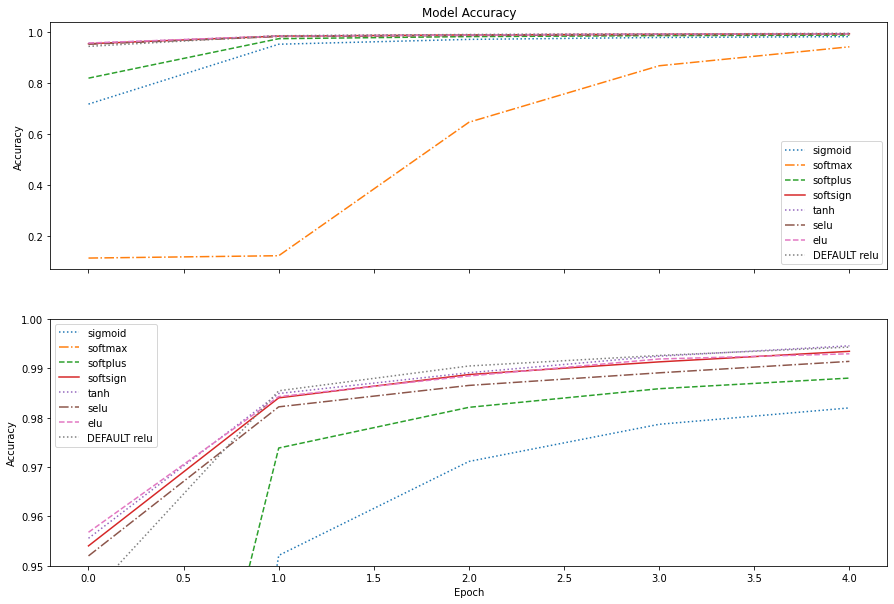

In [9]:
fig,axs=plt.subplots(2,1,figsize=(15,10),sharex=True)
for i in range(len(activation)):
    axs[0].plot(history_activ[i].history['accuracy'],linestyle=styles[i])
    axs[1].plot(history_activ[i].history['accuracy'],linestyle=styles[i])
axs[0].plot(history.history['accuracy'],linestyle=styles[len(activation)+1])
axs[1].plot(history.history['accuracy'],linestyle=styles[len(activation)+1])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[1].set_ylabel('Accuracy')
plt.xlabel('Epoch')
axs[0].legend(activation+['DEFAULT relu'], loc='lower right')
axs[1].legend(activation+['DEFAULT relu'], loc='upper left')
axes = plt.gca()
axs[1].set_ylim([0.95,1])
plt.show()

In [10]:
for i in range(len(activation)):
    row=[activation[i]]+model_activ[i].evaluate(test_images, test_labels)
    rows.append(row)
df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuarcy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.0406 - accuracy: 0.9886 - precision: 0.9888 - recall: 0.9880 - auc: 0.9990


,Type,Loss,Accuarcy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985


Funkcja aktywacji 'exponential' zwracała NaN'y, co uniemożliwiało naukę sieci dlatego jej tutaj nie uwzględniłem. Najbardziej zauważalne jest, że używając 'softmax' sieć uczy się zdecydowanie wolniej, co ma sens ponieważ funkcja ta jest po to by reprezentować prawdopodobieństwo inputu, dlatego też znajduje się zwykle tylko w ostatniej warstwie z outputem.

# AveragePooling

In [11]:
model_avg = models.Sequential()
model_avg.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_avg.add(layers.AveragePooling2D((2, 2)))
model_avg.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_avg.add(layers.AveragePooling2D((2, 2)))
model_avg.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_avg.add(layers.Flatten())
model_avg.add(layers.Dense(64, activation='relu'))
model_avg.add(layers.Dense(10, activation='softmax'))
model_avg.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
history_avg=model_avg.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.4356 - accuracy: 0.8645 - precision: 0.9260 - recall: 0.8090 - auc: 0.9816
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0638 - accuracy: 0.9805 - precision: 0.9830 - recall: 0.9784 - auc: 0.9992
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0408 - accuracy: 0.9869 - precision: 0.9882 - recall: 0.9858 - auc: 0.9995
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0304 - accuracy: 0.9906 - precision: 0.9913 - recall: 0.9899 - auc: 0.9995
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0248 - accuracy: 0.9919 - precision: 0.9922 - recall: 0.9916 - auc: 0.9996


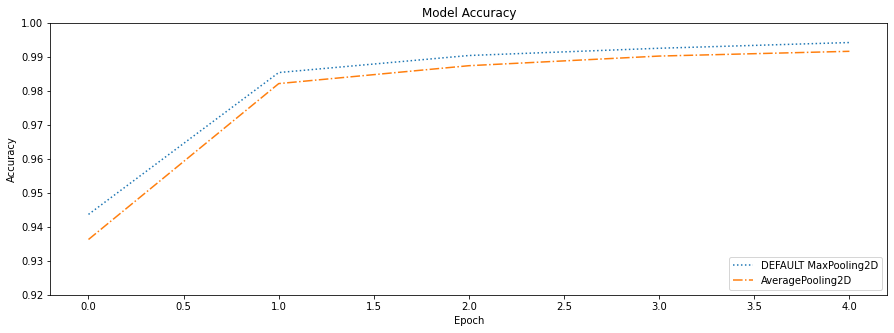

In [12]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
plt.plot(history_avg.history['accuracy'],linestyle=styles[1])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['DEFAULT MaxPooling2D','AveragePooling2D'], loc='lower right')
axes = plt.gca()
axes.set_ylim([0.92,1])
plt.show()

In [13]:
row=['AveragePooling']+model_avg.evaluate(test_images, test_labels)
rows.append(row)
df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.0294 - accuracy: 0.9907 - precision: 0.9917 - recall: 0.9904 - auc: 0.9994


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439


Użycie AveragePooling zamiast MaxPooling nieznacznie pogorszyło performance sieci. Na tyle na ile się zorientowałem to AvaregePooling jest lepszy tylko w nielicznych przypadkach i wszystko zależy od problemu i danych.

# Usuwanie Conv2D i MaxPooling

In [14]:
model_conv2d=[0]*2
history_conv2d=[0]*2
for i in range(2):
    model_conv2d[i] = models.Sequential()
    model_conv2d[i].add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    if i>=1:
        model_conv2d[i].add(layers.MaxPooling2D((2, 2)))
        model_conv2d[i].add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_conv2d[i].add(layers.Flatten())
    model_conv2d[i].add(layers.Dense(64, activation='relu'))
    model_conv2d[i].add(layers.Dense(10, activation='softmax'))
    model_conv2d[i].summary()
    model_conv2d[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    history_conv2d[i]=model_conv2d[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_9 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1384512   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 1,385,482
Trainable params: 1,385,482
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.3352 - accuracy: 0.8958 - precision: 0.9424 - recall: 0.8584 - auc: 0.9882
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0614 - accuracy: 

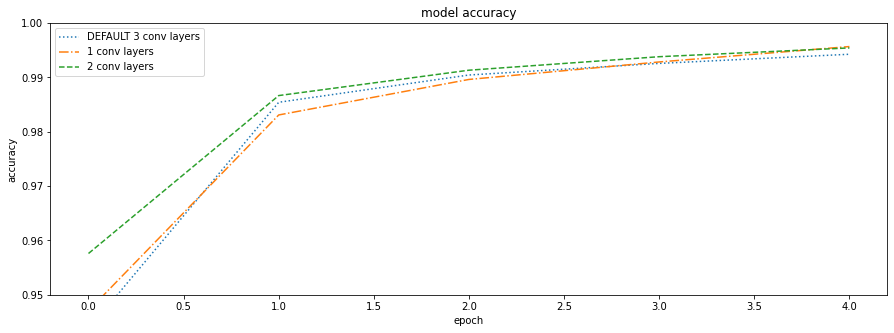

In [15]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
for i in range(2):
    plt.plot(history_conv2d[i].history['accuracy'],linestyle=styles[i+1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT 3 conv layers','1 conv layers','2 conv layers'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1])
plt.show()


In [16]:
for i in range(2):
    name=str(i+1)+" conv layers"
    row=[name]+model_conv2d[i].evaluate(test_images, test_labels)
    rows.append(row)
    df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9917 - precision: 0.9922 - recall: 0.9916 - auc: 0.9993


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Patrząc na wykres wygląda na to, że usunięcie warstw konwolucyjnych nie zmniejszyło znacząco wyników sieci tak jakby początkowo można było przypuszczać.

# Dodanie Dropout

In [17]:
model_dropout=[0]*8
history_dropout=[0]*8
for i in range(8):
    model_dropout[i] = models.Sequential()
    model_dropout[i].add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_dropout[i].add(layers.MaxPooling2D((2, 2)))
    model_dropout[i].add(Dropout((i+1)*0.1))
    model_dropout[i].add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_dropout[i].add(layers.MaxPooling2D((2, 2)))
    model_dropout[i].add(Dropout((i+1)*0.1))
    model_dropout[i].add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_dropout[i].add(Dropout((i+1)*0.1))
    model_dropout[i].add(layers.Flatten())
    model_dropout[i].add(layers.Dense(64, activation='relu'))
    model_dropout[i].add(layers.Dense(10, activation='softmax'))
    model_dropout[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    history_dropout[i]=model_dropout[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.4316 - accuracy: 0.8591 - precision: 0.9280 - recall: 0.8081 - auc: 0.9804
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0574 - accuracy: 0.9832 - precision: 0.9851 - recall: 0.9820 - auc: 0.9991
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0386 - accuracy: 0.9879 - precision: 0.9889 - recall: 0.9871 - auc: 0.9994
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0333 - accuracy: 0.9898 - precision: 0.9904 - recall: 0.9893 - auc: 0.9995
Epoch 5/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0264 - accuracy: 0.9914 - precision: 0.9921 - recall: 0.9911 - auc: 0.9996
Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.4627 - accuracy: 0.8479 - precision: 0.9209 - recall: 0.7925 - auc: 0.9776
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0704 - accuracy: 0.9782 -

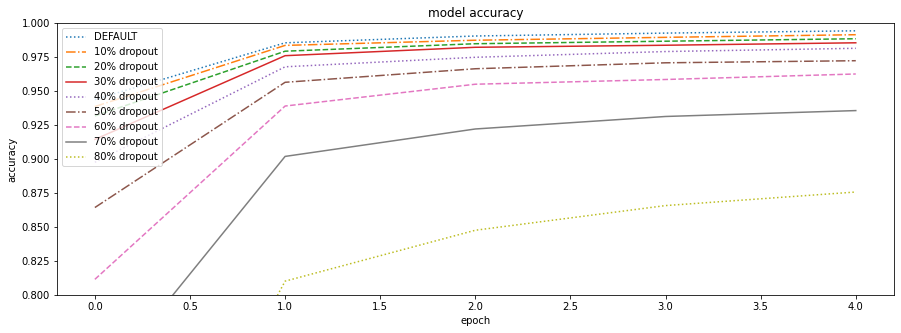

In [18]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
for i in range(8):
    plt.plot(history_dropout[i].history['accuracy'],linestyle=styles[i+1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT','10% dropout','20% dropout','30% dropout','40% dropout','50% dropout','60% dropout',
            '70% dropout','80% dropout'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.8,1])
plt.show()

In [19]:
for i in range(8):
    name=str((i+1)*10)+"% dropout"
    row=[name]+model_dropout[i].evaluate(test_images, test_labels)
    rows.append(row)
    df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.1689 - accuracy: 0.9634 - precision: 0.9799 - recall: 0.9408 - auc: 0.9989


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Obserwujemy, że dodanie dropout'u większego niż 40% niegatywnie wpływa na wynik sieci. 

# Usunięcie warstwy Dense

In [20]:
model_dense = models.Sequential()
model_dense.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dense.add(layers.MaxPooling2D((2, 2)))
model_dense.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dense.add(layers.MaxPooling2D((2, 2)))
model_dense.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dense.add(layers.Flatten())
model_dense.add(layers.Dense(10, activation='softmax'))
model_dense.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
history_dense=model_dense.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.3876 - accuracy: 0.8766 - precision: 0.9394 - recall: 0.8247 - auc: 0.9841
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0534 - accuracy: 0.9835 - precision: 0.9853 - recall: 0.9817 - auc: 0.9994
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0362 - accuracy: 0.9895 - precision: 0.9905 - recall: 0.9884 - auc: 0.9994
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0258 - accuracy: 0.9920 - precision: 0.9924 - recall: 0.9917 - auc: 0.9996
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0196 - accuracy: 0.9943 - precision: 0.9946 - recall: 0.9940 - auc: 0.9996


In [21]:
name="1 dense layer"
row=[name]+model_dense.evaluate(test_images, test_labels)
rows.append(row)
df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.0268 - accuracy: 0.9918 - precision: 0.9925 - recall: 0.9917 - auc: 0.9994


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Usunięcie jednej z warstw Dense samo w sobie także nie wpływa znacznie na wyniki sieci.

# Zmiana w filtrach

In [22]:
model_filtr=[0]*3
history_filtr=[0]*3
for i in range(3):
    model_filtr[i] = models.Sequential()
    model_filtr[i].add(layers.Conv2D(2**i, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_filtr[i].add(layers.MaxPooling2D((2, 2)))
    model_filtr[i].add(layers.Conv2D(2**(i+1), (3, 3), activation='relu'))
    model_filtr[i].add(layers.MaxPooling2D((2, 2)))
    model_filtr[i].add(layers.Conv2D(2**(i+1), (3, 3), activation='relu'))
    model_filtr[i].add(layers.Flatten())
    model_filtr[i].add(layers.Dense(10, activation='softmax'))
    model_filtr[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    history_filtr[i]=model_filtr[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 8ms/step - loss: 1.9132 - accuracy: 0.3421 - precision: 0.6274 - recall: 0.0884 - auc: 0.7488
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.8454 - accuracy: 0.7167 - precision: 0.8156 - recall: 0.6162 - auc: 0.9581
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.6585 - accuracy: 0.7835 - precision: 0.8436 - recall: 0.7224 - auc: 0.9730
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5714 - accuracy: 0.8163 - precision: 0.8619 - recall: 0.7673 - auc: 0.9789
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5158 - accuracy: 0.8322 - precision: 0.8724 - recall: 0.7945 - auc: 0.9824
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 1.6142 - accuracy: 0.4281 - precision: 0.7062 - recall: 0.2122 - auc: 0.8310
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.4543 - accuracy: 0.8590 -

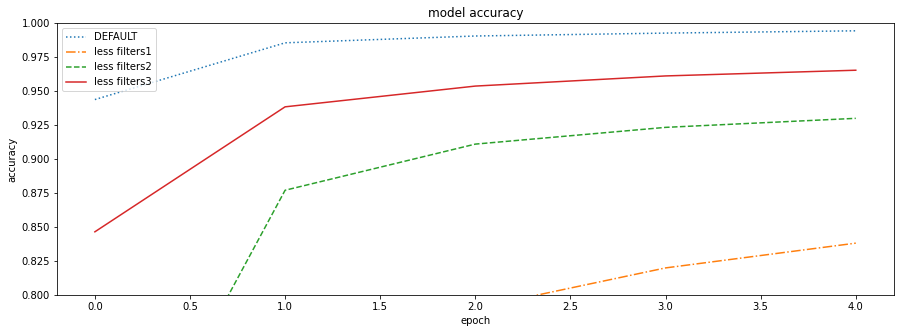

In [23]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
for i in range(3):
    plt.plot(history_filtr[i].history['accuracy'],linestyle=styles[i+1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT','less filters1','less filters2','less filters3'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.8,1])
plt.show()

In [24]:
for i in range(3):
    name="less filters"+str(i+1)
    row=[name]+model_filtr[i].evaluate(test_images, test_labels)
    rows.append(row)
    df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.1014 - accuracy: 0.9688 - precision: 0.9734 - recall: 0.9664 - auc: 0.9982


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Zmniejszenie ilości filtrów w warstwach konwolucyjnych zauważalnie pogarsza naukę i końcowy performance sieci.

In [25]:
model_filtr_size=[0]*3
history_filtr_size=[0]*3
for i in range(3):
    model_filtr_size[i] = models.Sequential()
    model_filtr_size[i].add(layers.Conv2D(32, (3+i+1, 3+i+1), activation='relu', input_shape=(28, 28, 1)))
    model_filtr_size[i].add(layers.MaxPooling2D((2, 2)))
    model_filtr_size[i].add(layers.Conv2D(64, (3+i+1, 3+i+1), activation='relu'))
    model_filtr_size[i].add(layers.Flatten())
    model_filtr_size[i].add(layers.Dense(10, activation='softmax'))
    model_filtr_size[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    history_filtr_size[i]=model_filtr_size[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.3043 - accuracy: 0.9046 - precision: 0.9478 - recall: 0.8693 - auc: 0.9896
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0480 - accuracy: 0.9850 - precision: 0.9867 - recall: 0.9839 - auc: 0.9993
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0336 - accuracy: 0.9898 - precision: 0.9908 - recall: 0.9892 - auc: 0.9994
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0258 - accuracy: 0.9923 - precision: 0.9931 - recall: 0.9920 - auc: 0.9997
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0186 - accuracy: 0.9946 - precision: 0.9948 - recall: 0.9944 - auc: 0.9997
Epoch 1/5
938/938 [==============================] - 8s 7ms/step - loss: 0.3150 - accuracy: 0.9036 - precision: 0.9427 - recall: 0.8643 - auc: 0.9887
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0417 - accuracy: 0.9878 -

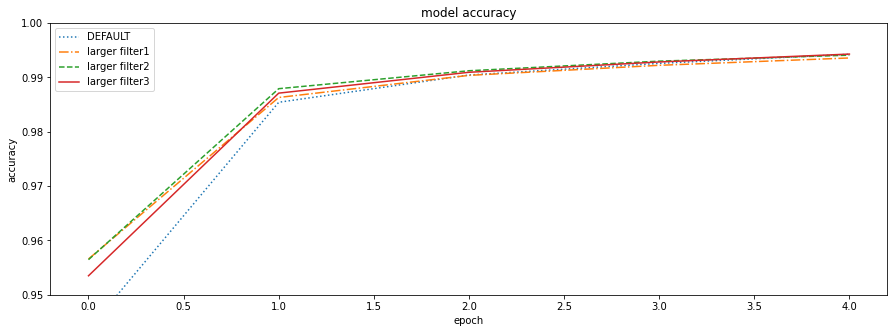

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
for i in range(3):
    plt.plot(history_filtr_size[i].history['accuracy'],linestyle=styles[i+1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT','larger filter1','larger filter2','larger filter3'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1])
plt.show()

In [27]:
for i in range(3):
    name="larger filter"+str(i+1)
    row=[name]+model_filtr_size[i].evaluate(test_images, test_labels)
    rows.append(row)
    df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 6ms/step - loss: 0.0238 - accuracy: 0.9930 - precision: 0.9934 - recall: 0.9929 - auc: 0.9995


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Zaskakująco zwiększenie wielkości filtra w tym problemie nie wpływa na końcowy wynik.

In [28]:
model_filtr_size_number=[0]*3
history_filtr_size_number=[0]*3
for i in range(3):
    model_filtr_size_number[i] = models.Sequential()
    model_filtr_size_number[i].add(layers.Conv2D(2**i, (6-i, 6-i), activation='relu', input_shape=(28, 28, 1)))
    model_filtr_size_number[i].add(layers.Flatten())
    model_filtr_size_number[i].add(layers.Dense(10, activation='softmax'))
    model_filtr_size_number[i].compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
    history_filtr_size_number[i]=model_filtr_size_number[i].fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.7661 - accuracy: 0.7767 - precision: 0.8903 - recall: 0.6368 - auc: 0.9588
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3507 - accuracy: 0.9020 - precision: 0.9224 - recall: 0.8825 - auc: 0.9894
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3343 - accuracy: 0.9053 - precision: 0.9277 - recall: 0.8889 - auc: 0.9902
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3037 - accuracy: 0.9145 - precision: 0.9321 - recall: 0.8996 - auc: 0.9915
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2936 - accuracy: 0.9160 - precision: 0.9338 - recall: 0.9010 - auc: 0.9920
Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.5617 - accuracy: 0.8418 - precision: 0.9203 - recall: 0.7448 - auc: 0.9773
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2886 - accuracy: 0.9199 -

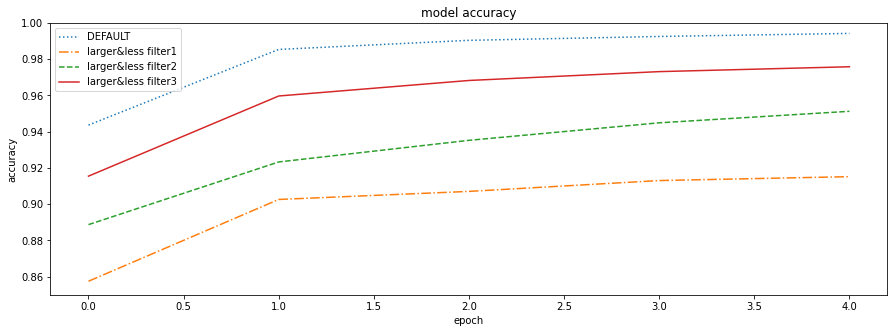

In [29]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
for i in range(3):
    plt.plot(history_filtr_size_number[i].history['accuracy'],linestyle=styles[i+1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT','larger&less filter1','larger&less filter2','larger&less filter3'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.85,1])
plt.show()

In [30]:
for i in range(3):
    name="larger&less filter"+str(i+1)
    row=[name]+model_filtr_size_number[i].evaluate(test_images, test_labels)
    rows.append(row)
    df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 5ms/step - loss: 0.0822 - accuracy: 0.9748 - precision: 0.9776 - recall: 0.9736 - auc: 0.9985


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Powiększenie filtrów i zmniejszenie ich ilości razem również pogarsza naukę, chociaż patrząc na poprzednie przypadki w większości pewnie odpowiada za to ilość filtrów.

# Bardzo zły model

In [31]:
model_for_fun=models.Sequential()
model_for_fun.add(layers.Conv2D(1, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model_for_fun.add(layers.MaxPooling2D((5, 5)))
model_for_fun.add(layers.Flatten())
model_for_fun.add(layers.Dense(10, activation='softmax'))
model_for_fun.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name="precision"),Recall(name="recall"),AUC(name='auc')])
history_for_fun=model_for_fun.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 1.8073 - accuracy: 0.3569 - precision: 0.6684 - recall: 0.1277 - auc: 0.7749
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.7756 - accuracy: 0.7554 - precision: 0.8527 - recall: 0.6548 - auc: 0.9645
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.6438 - accuracy: 0.8005 - precision: 0.8681 - recall: 0.7329 - auc: 0.9745
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.6043 - accuracy: 0.8102 - precision: 0.8709 - recall: 0.7540 - auc: 0.9769
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.5790 - accuracy: 0.8185 - precision: 0.8728 - recall: 0.7677 - auc: 0.9786


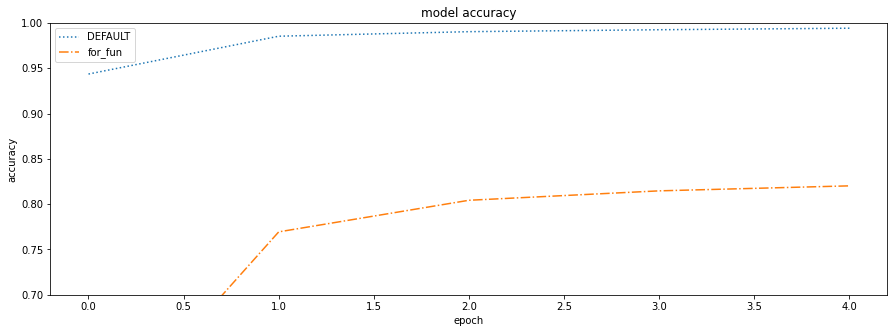

In [32]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'],linestyle=styles[0])
plt.plot(history_for_fun.history['accuracy'],linestyle=styles[1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['DEFAULT','for_fun'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0.70,1])
plt.show()

In [33]:
name="for fun"
row=[name]+model_for_fun.evaluate(test_images, test_labels)
rows.append(row)
df=pd.DataFrame(data=rows,columns=["Type",'Loss','Accuracy','Precision','Recall','AUC'])
df

313/313 [==============================] - 2s 5ms/step - loss: 0.5364 - accuracy: 0.8329 - precision: 0.8815 - recall: 0.7892 - auc: 0.9806


,Type,Loss,Accuracy,Precision,Recall,AUC
0,DEFAULT,0.022931,0.9929,0.993197,0.9928,0.999598
1,sigmoid,0.049129,0.9841,0.985858,0.9829,0.999703
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
3,softplus,0.060803,0.9813,0.981975,0.9806,0.998860
4,softsign,0.032407,0.9890,0.989885,0.9884,0.999581
5,tanh,0.033272,0.9897,0.990783,0.9890,0.999403
6,selu,0.059369,0.9849,0.985380,0.9840,0.997994
7,elu,0.040555,0.9886,0.988791,0.9880,0.998985
8,AveragePooling,0.029436,0.9907,0.991689,0.9904,0.999439
9,1 conv layers,0.050330,0.9853,0.986079,0.9846,0.999047


Połączenie zmian, które wcześniej ,przynajmniej w małym stopniu, negatywnie odbiły się na jakości sieci, czyli: \
-Usunięcie warstw konwolucyjnych \
-Zmniejszenie ilości filtrów \
-Powiększenie filtrów \
-Zmiana funkcji aktywacji na softmax \
poskutkowało w stworzeniu sieci, która radzi sobie znacząco gorzej.

# Podsumowanie
Ze względu na to, że wybrany problem był bardzo prosty  większość modyfikacji nie wpływała znacznie na końcowy wynik. Jednakże drastyczne zmniejszenie ilości filtrów w warstwach konwolucyjnych lub użycie funkcji softmax jako funkcji aktywacyjnej w hidden layers zauważalnie zmniejszyło szybkość uczenia się i końcowy performance.

In [34]:
df.nlargest(6,'Loss').sort_values(by=['Loss'])

,Type,Loss,Accuracy,Precision,Recall,AUC
18,80% dropout,0.168910,0.9634,0.979898,0.9408,0.998939
21,less filters2,0.203013,0.9383,0.947379,0.9290,0.996129
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
26,larger&less filter1,0.286175,0.9181,0.933086,0.9064,0.991951
20,less filters1,0.456084,0.8526,0.887943,0.8241,0.985862
29,for fun,0.536430,0.8329,0.881492,0.7892,0.980643


In [35]:
df.nsmallest(6,'Accuracy').sort_values(by=['Accuracy'])

,Type,Loss,Accuracy,Precision,Recall,AUC
29,for fun,0.536430,0.8329,0.881492,0.7892,0.980643
20,less filters1,0.456084,0.8526,0.887943,0.8241,0.985862
26,larger&less filter1,0.286175,0.9181,0.933086,0.9064,0.991951
21,less filters2,0.203013,0.9383,0.947379,0.9290,0.996129
2,softmax,0.244180,0.9545,0.969813,0.9413,0.996088
27,larger&less filter2,0.157013,0.9571,0.964499,0.9509,0.996469
